In [1]:
%load_ext autoreload
%autoreload 2

import os
os.chdir("..")

In [2]:
from sam import *
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
from copy import deepcopy
from sam.data_formats import read_data
from sam.helpers import pad_c0

In [13]:
names = [
    ("2001 Liess-food, UV Cu/data.xlsx", "Food_1% + UV"),
    ("2019 Naeem-Esf, Pro, food/21_days.xlsx", "Food_1% + Prochloraz_100"),
    ("2019 Naeem-Esf, Pro, food/21_days.xlsx", "Food_1% + Prochloraz_32"),
    ("2024 Naeem-Esfe, °C, food/21_days.xlsx", "Food_1% + Temp_25"),
]

In [35]:
def pred_exp(path, exp, new = False, hormesis_index = None, title = None):
    
    settings = deepcopy(STANDARD_SAM_SETTING)
    settings.cancel_system_stress = new
    
    
    data = read_data(f"data/{path}")
    
    val = data.additional_stress[exp]
    
    main_fit, stress_fit, sam_sur, sam_stress, additional_stress = sam_prediction(
        data.main_series,
        val,
        data.meta,
        settings=settings,
        hormesis_index=hormesis_index
    )

    lcs = get_sam_lcs(stress_fit=stress_fit, sam_sur=sam_sur, meta=data.meta)

    fig = plot_sam_prediction(
        main_fit,
        stress_fit,
        sam_sur,
        sam_stress,
        survival_max=data.meta.max_survival,
        lcs=lcs,
        title=title,
    )
    
    
    if new:
        fig.axes[0].plot(main_fit.concentrations, main_fit.modified_control_surv, label = "Without Sys")
        fig.axes[1].plot(main_fit.concentrations, main_fit.modified_control_stress, label = "Without Sys")
        fig.axes[-1].plot(main_fit.concentrations, main_fit.pred_system_stress, label = "System")
        fig.axes[-1].legend()
    plt.show()

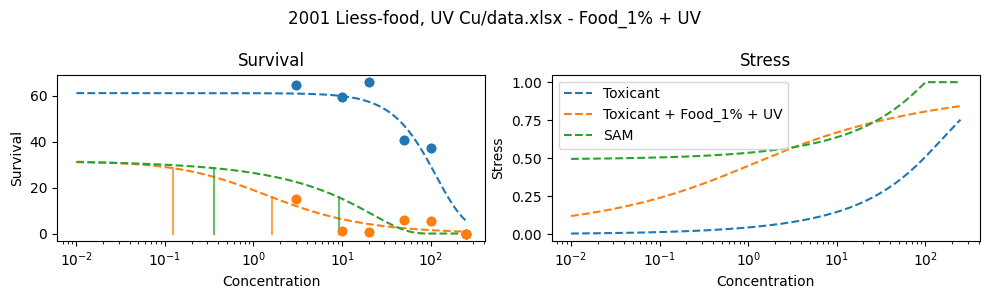

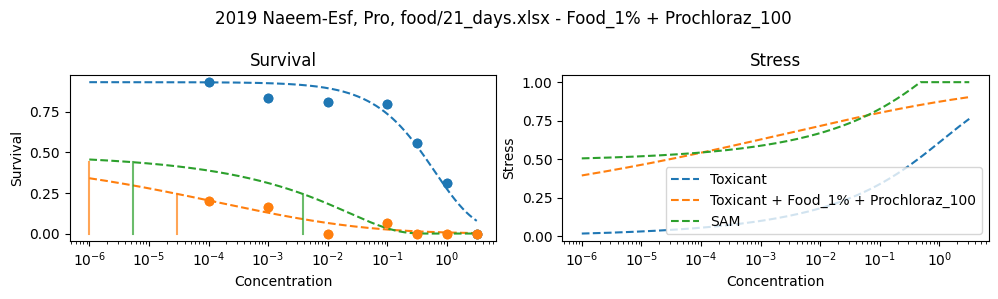

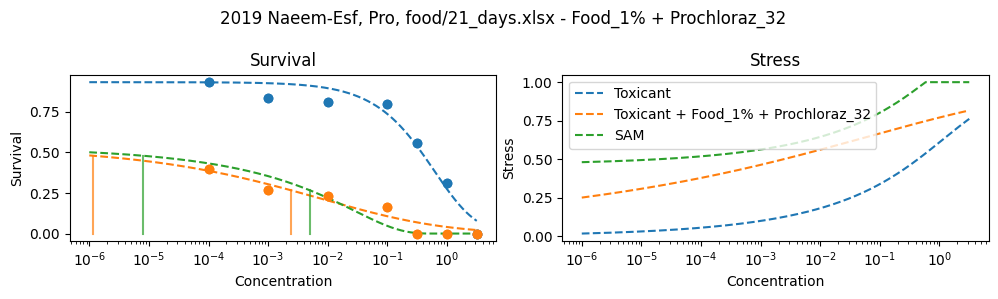

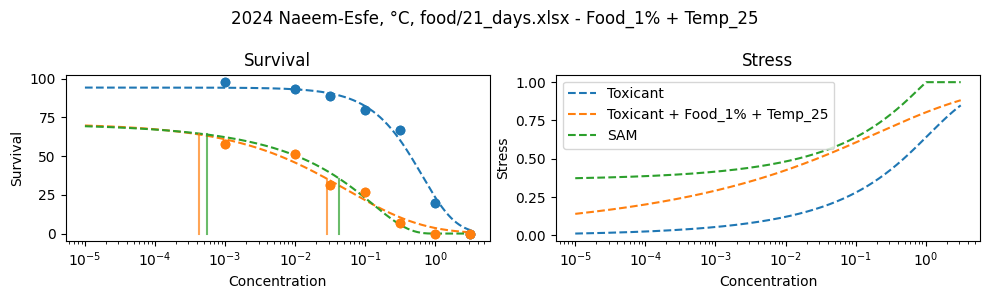

In [15]:
for name in names:
    
    title = " - ".join(name)
    pred_exp(*name, new = False, hormesis_index= None, title=title)
    
    

In [56]:
data = read_data("data/2019 Naeem-Esf, Pro, food/21_days.xlsx")
sets = DRF_Settings(max_survival=data.meta.max_survival, param_d_norm=True)
main_fit = dose_response_fit(data.main_series,sets)
no_norm = dose_response_fit(data.main_series, DRF_Settings(max_survival=data.meta.max_survival, param_d_norm=False))

from sam.system_stress import calc_system_stress

cleaned_func, _ = calc_system_stress(data.main_series, main_fit, 3, cfg = sets)
clean_curve = cleaned_func(main_fit.concentrations)


Momentane Formel ist ja


stress = survival2stress(survival_curve / c0)

Problem ist dass die Stress Kurve 

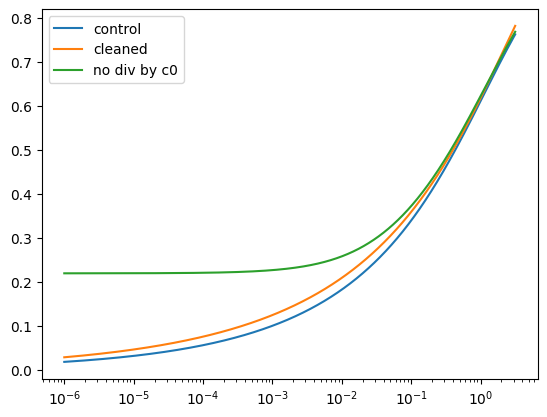

In [58]:
plt.plot(main_fit.concentrations, main_fit.stress_curve, label = "control")
plt.plot(main_fit.concentrations, survival_to_stress(clean_curve), label = "cleaned")
plt.plot(main_fit.concentrations, no_norm.stress_curve, label = "no div by c0")
plt.xscale("log")
plt.legend()

In [ ]:

main_fit

ModelPredictions(concentrations=array([1.00000000e-02, 1.00101328e-02, 1.00202758e-02, ...,
       2.49494130e+02, 2.49746937e+02, 2.50000000e+02]), survival_curve=array([61.06397587, 61.06397583, 61.0639758 , ...,  5.66617778,
        5.6506534 ,  5.6351592 ]), stress_curve=array([0.32250946, 0.32250946, 0.32250946, ..., 0.77082794, 0.77105701,
       0.77128598]), predicted_survival=array([0.81418634, 0.81158514, 0.79699935, 0.76424076, 0.62710247,
       0.3934819 , 0.07513546]), optim_param={'c': 0, 'd': 0.8141866666666666, 'b': 1.5779093831440243, 'e': 249.99999999999804, 'f': 3.4377938233739527}, model=<function fit_ll5.<locals>.<lambda> at 0x78458c5976a0>, lc1=6.199506817123603, lc99=481.98348343186507, inputs=DoseResponseSeries(concentration=array([  0.,   3.,  10.,  20.,  50., 100., 250.]), survival_rate=array([54.4   , 64.736 , 59.296 , 65.824 , 40.7456, 37.0464,  0.    ]), name='Toxicant', meta=ExperimentMetaData(organism='Amphipod', main_stressor='Copper', max_survival=75, 

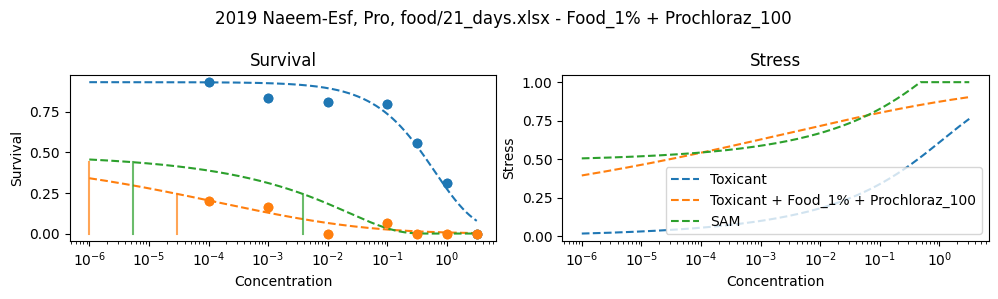

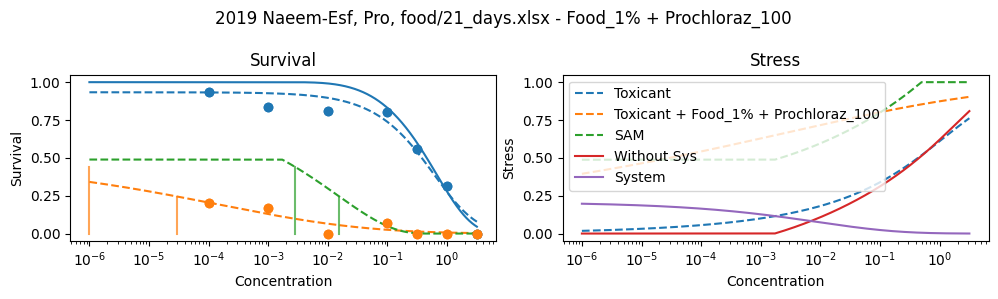

In [37]:
name = names[1]
pred_exp(*name, new = False, hormesis_index= None, title = " - ".join(name))
pred_exp(*name, new = True, hormesis_index= 4, title = " - ".join(name))

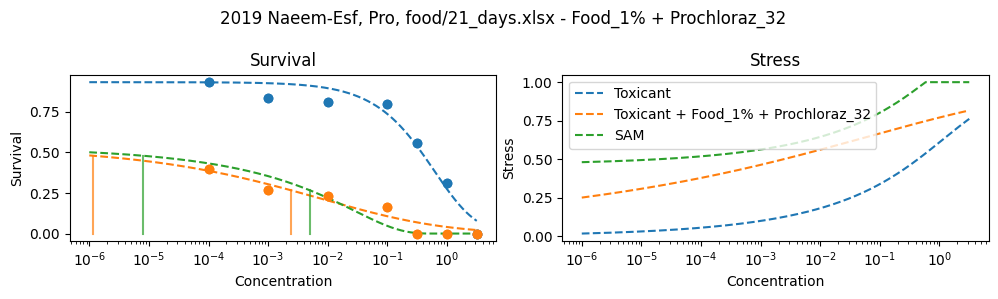

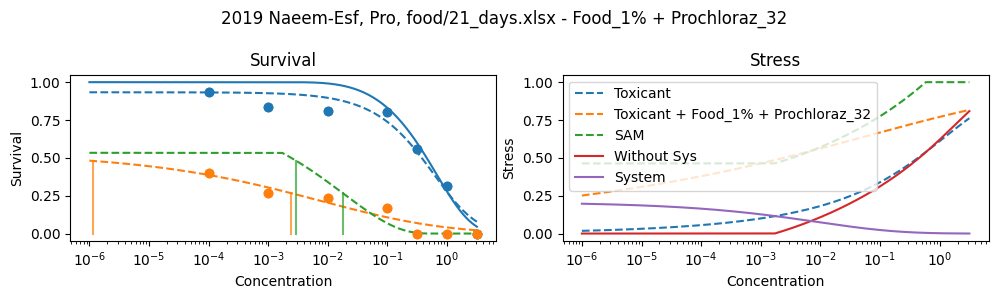

In [36]:
name = names[2]
pred_exp(*name, new = False, hormesis_index= None, title = " - ".join(name))
pred_exp(*name, new = True, hormesis_index= 4, title = " - ".join(name))

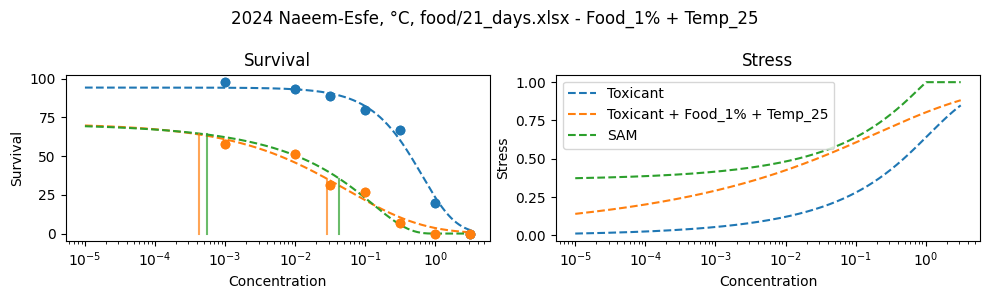

/home/felix/Desktop/sam/src/sam/stress_addition_model.py:163: UserWarning: could not find hormesis index, detecting it to be 2
  warn(f"could not find hormesis index, detecting it to be {hormesis_index}")


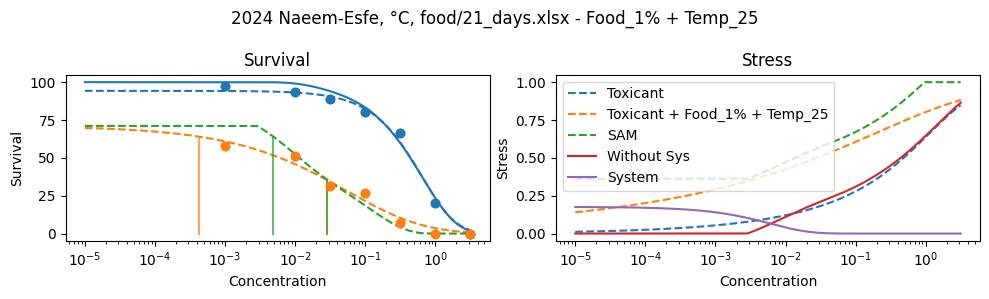

In [38]:
name = names[-1]
pred_exp(*name, new = False, hormesis_index= None, title = " - ".join(name))
pred_exp(*name, new = True, hormesis_index= None, title = " - ".join(name))